In [1]:
import sys
import jinja2

print(sys.__name__)

sys


In [2]:
jsm_format = """import {calculate, Generations, Pokemon, Move} from '@smogon/calc';

const gen = Generations.get(9); // alternatively: const gen = 5;

const result = calculate(
  gen,
  new Pokemon(gen, '{{p1}}', {
    item: '{{i1}}',
    level: 50,
    nature: '{{n1}}',
    evs: {{evs1}},
    boosts: {{boosts1}},
  }),
  new Pokemon(gen, '{{p2}}', {
    item: '{{i2}}',
    level: 50,
    nature: '{{n2}}',
    evs: {{evs2}},
    boosts: {{boosts2}},
  }),
  new Move(gen, '{{m1}}'),
);
//
console.log(result); // 74.6 - 87.8%
// Save json
import fs from 'fs';
fs.writeFileSync('result.json', JSON.stringify(result));
"""
# render the template
template = jinja2.Template(jsm_format)
rendered = template.render(
    p1='Gengar', 
    i1='Life Orb', 
    n1='Timid', 
    evs1='{hp: 0, atk: 0, def: 0, spa: 252, spd: 4, spe: 252}', 
    boosts1='0', 
    p2='Mewtwo', 
    i2='Sitrus Berry', 
    n2='Timid', 
    evs2='{hp: 0, atk: 0, def: 0, spa: 252, spd: 4, spe: 252}', 
    boosts2='+1', 
    m1='Shadow Ball')
print(rendered)

def render_move(p1: int, i1: str, n1: str, evs1: dict, boosts1: str, 
                p2: str, i2: str, n2: str, evs2: dict, boosts2: str, 
                m1: str):
    """_summary_

    Args:
        p1 (int): poke1
        i1 (str): item1
        n1 (str): nature1
        evs1 (dict): evs1
        boosts1 (str): boosts1
        p2 (str): poke2
        i2 (str): item2
        n2 (str): nature2
        evs2 (dict): evs2
        boosts2 (str): boosts2
        m1 (str): move1

    Returns:
        _type_: string
    """
    evs1 = str(evs1).replace("'", "")
    evs2 = str(evs2).replace("'", "")
    template = jinja2.Template(jsm_format)
    rendered = template.render(
        p1=p1, 
        i1=i1, 
        n1=n1, 
        evs1=evs1, 
        boosts1=boosts1, 
        p2=p2, 
        i2=i2, 
        n2=n2, 
        evs2=evs2, 
        boosts2=boosts2, 
        m1=m1)
    return rendered



import {calculate, Generations, Pokemon, Move} from '@smogon/calc';

const gen = Generations.get(9); // alternatively: const gen = 5;

const result = calculate(
  gen,
  new Pokemon(gen, 'Gengar', {
    item: 'Life Orb',
    level: 50,
    nature: 'Timid',
    evs: {hp: 0, atk: 0, def: 0, spa: 252, spd: 4, spe: 252},
    boosts: 0,
  }),
  new Pokemon(gen, 'Mewtwo', {
    item: 'Sitrus Berry',
    level: 50,
    nature: 'Timid',
    evs: {hp: 0, atk: 0, def: 0, spa: 252, spd: 4, spe: 252},
    boosts: +1,
  }),
  new Move(gen, 'Shadow Ball'),
);
//
console.log(result); // 74.6 - 87.8%
// Save json
import fs from 'fs';
fs.writeFileSync('result.json', JSON.stringify(result));


In [82]:
from bs4 import BeautifulSoup
import requests




def get_team(url):
    url = f'https://play.limitlesstcg.com{href}/teamlist'
    print(url)
    # url = "https://play.limitlesstcg.com/tournament/660dbe76bd59c305cfa7fa54/player/johnnychiou36/teamlist"


    # Read the HTML content from web address
    html_content = requests.get(url).text

    pokemon = []
    items = []
    abilities = []
    moves = [[]]
    pokemon_idx = 0
    for i,line in enumerate(html_content.split('\n')[-54:]):
        if i == 0:
            pokemon_items = " ".join(line.split('>')[-1:][0].split(" ")[3:])[1:].split(" @ ")
            pokemon.append(pokemon_items[0].replace("-", " "))
            if len(pokemon_items) > 1:
                items.append(pokemon_items[1])
        elif i < 47:
            if line.__contains__("@"):
                pokemon_items = line.split(" @ ")
                pokemon.append(pokemon_items[0].replace("-", " "))
                items.append(pokemon_items[1])
                pokemon_idx += 1
                moves.append([])
            if line.__contains__("Ability"):
                abilities.append(line[9:])
            if line.__contains__("- "):
                moves[pokemon_idx].append(line[2:])
            # print(i, line)

    print(pokemon)
    print(items)
    print(abilities)
    print(moves)
    return {"pokemon": pokemon, "items": items, "abilities": abilities, "moves": moves}




['/tournament/660dbe76bd59c305cfa7fa54/player/michaelderbeste', '/tournament/660dbe76bd59c305cfa7fa54/player/joeux9', '/tournament/660dbe76bd59c305cfa7fa54/player/goldenage', '/tournament/660dbe76bd59c305cfa7fa54/player/miraiiiiii', '/tournament/660dbe76bd59c305cfa7fa54/player/wowyang', '/tournament/660dbe76bd59c305cfa7fa54/player/chasemeshell', '/tournament/660dbe76bd59c305cfa7fa54/player/refamici94', '/tournament/660dbe76bd59c305cfa7fa54/player/cammyrupt', '/tournament/660dbe76bd59c305cfa7fa54/player/ibsan08', '/tournament/660dbe76bd59c305cfa7fa54/player/pelluhue', '/tournament/660dbe76bd59c305cfa7fa54/player/nightflash2735', '/tournament/660dbe76bd59c305cfa7fa54/player/scarletskil', '/tournament/660dbe76bd59c305cfa7fa54/player/davidness07', '/tournament/660dbe76bd59c305cfa7fa54/player/dlers', '/tournament/660dbe76bd59c305cfa7fa54/player/zerkomvgc', '/tournament/660dbe76bd59c305cfa7fa54/player/vovomaxben10', '/tournament/660dbe76bd59c305cfa7fa54/player/aminko', '/tournament/660dbe76b

Text(0.25, 0.25, '-132%')

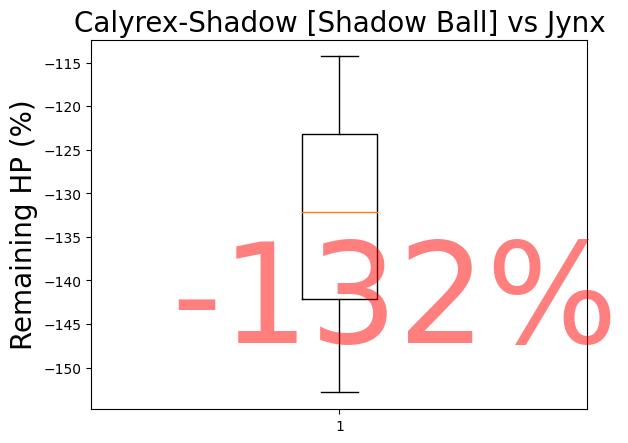

In [132]:
#  call javascript
import os
import re
import json
import numpy as np
import matplotlib.pyplot as plt

#  san serif font
plt.rcParams['font.family'] = 'sans-serif'

FONTSIZE = 20

def find_damage(output: str) -> np.array:
    """_summary_

    Args:
        output (str): _description_

    Returns:
        np.array: _description_
    """
    try:
        output = output.strip()
        output = output.split("\n")
        #  find "damage: ["
        damage = [i for i, s in enumerate(output) if "damage: [" in s]
        # find the close bracket
        close_bracket = [i for i, s in enumerate(output) if "  ]," in s]
        #  find the damage values
        damage_values = []
        for i in range(len(damage)):
            clsbrk = [i for i in close_bracket if i > damage[0]]
            damage_values.append(output[damage[i]:clsbrk[0]])
        return np.array([int(x) for x in "".join(damage_values[0][1:]).split(",")])
    except Exception as e:
        # print(e)
        return np.array([0])

def get_hp(output: str) -> int:
    output = output.strip()
    output = output.split("\n")
    #  find "originalCurHP"
    hp = [i for i, s in enumerate(output) if "originalCurHP" in s]
    #  find the hp value
    hp_values = []
    for i in range(len(hp)):
        hp_values.append(output[hp[i]])
    return int(hp_values[1].split(":")[1].strip().replace(",", ""))

def outputToDict(output: str)->dict:
    """_summary_

    Args:
        output (str): _description_

    Returns:
        dict: _description_
    """
    raise NotImplementedError

def strip_ansi_codes(text):
    # Regex to remove ANSI escape codes
    ansi_escape = re.compile(r'\x1B(?:[@-Z\\-_]|\[[0-?]*[ -/]*[@-~])')
    return ansi_escape.sub('', text)

def run_command(command: str, verbose=False)->str:
    """_summary_

    Args:
        command (str): _description_

    Returns:
        str: _description_
    """
    #  pipe system command output to stdout
    result = str(os.popen(command).read())
    # Strip ANSI codes
    clean_result = strip_ansi_codes(result)
    if verbose:
        print(clean_result)
    return clean_result


def get_stats(move: str)->str:
    with open("test.mjs", "w") as f:
        f.write(move)
    command = "cat test.mjs | node --experimental-modules --input-type=module"
    clean_result = run_command(command)
    return clean_result

def get_damage(clean_result: str)->np.array:
    return find_damage(clean_result)

def hp_color(hp: int):
    if hp > 50:
        return "green"
    elif hp > 25:
        return "yellow"
    else:
        return "red"

move_py = ['Calyrex-Shadow', 'Choice Specs', 'Calm', 
                   {"hp": 0, "atk": 0, "def": 0, "spa": 252, "spd": 252, "spe": 252}, '{spa: 1}',
                    'Jynx', 'Sitrus Berry', 'Timid', 
                    {"hp": 0, "atk": 0, "def": 0, "spa": 252, "spd": 252, "spe": 252}, '0',
                    'Shadow Ball']

move = render_move(*move_py)

result = get_stats(move)
                       
damage = get_damage(result)
hp = get_hp(result)
remaining_hp = 100*(hp - damage)/hp

plt.boxplot(remaining_hp)
plt.title(f"{move_py[0]} [{move_py[-1]}] vs {move_py[5]}", fontdict={"fontsize": FONTSIZE})
plt.ylabel("Remaining HP (%)", fontsize=FONTSIZE)
plt.text(0.25, 0.25, f"{np.median(remaining_hp):.0f}%", fontsize=FONTSIZE*5, 
         alpha=0.5, 
         color=hp_color(np.max(remaining_hp)),
         transform=plt.gcf().transFigure)
# plt.xlabel("Frequency", fontsize=FONTSIZE)

In [91]:
webaddress = 'https://play.limitlesstcg.com/tournament/660dbe76bd59c305cfa7fa54/standings'
# Read the HTML content from web address
html_content = requests.get(webaddress).text
# Parse the HTML
soup = BeautifulSoup(html_content, 'html.parser')

# Find the last row of the table with class 'striped'
striped_rows = soup.find('table', class_='striped').find_all('tr')
afind = [x.find('a') for x in striped_rows]
ref = [x['href'] for x in afind if x is not None]
print(ref)
teams = []

for href in ref[:2]:
    teams.append(get_team(href))

['/tournament/660dbe76bd59c305cfa7fa54/player/michaelderbeste', '/tournament/660dbe76bd59c305cfa7fa54/player/joeux9', '/tournament/660dbe76bd59c305cfa7fa54/player/goldenage', '/tournament/660dbe76bd59c305cfa7fa54/player/miraiiiiii', '/tournament/660dbe76bd59c305cfa7fa54/player/wowyang', '/tournament/660dbe76bd59c305cfa7fa54/player/chasemeshell', '/tournament/660dbe76bd59c305cfa7fa54/player/refamici94', '/tournament/660dbe76bd59c305cfa7fa54/player/cammyrupt', '/tournament/660dbe76bd59c305cfa7fa54/player/ibsan08', '/tournament/660dbe76bd59c305cfa7fa54/player/pelluhue', '/tournament/660dbe76bd59c305cfa7fa54/player/nightflash2735', '/tournament/660dbe76bd59c305cfa7fa54/player/scarletskil', '/tournament/660dbe76bd59c305cfa7fa54/player/davidness07', '/tournament/660dbe76bd59c305cfa7fa54/player/dlers', '/tournament/660dbe76bd59c305cfa7fa54/player/zerkomvgc', '/tournament/660dbe76bd59c305cfa7fa54/player/vovomaxben10', '/tournament/660dbe76bd59c305cfa7fa54/player/aminko', '/tournament/660dbe76b

In [92]:
teams

[{'pokemon': ['Koraidon',
   'Amoonguss',
   'Walking Wake',
   'Incineroar',
   'Flutter Mane',
   'Farigiraf'],
  'items': ['Clear Amulet',
   'Rocky Helmet',
   'Life Orb',
   'Assault Vest',
   'Choice Specs',
   'Sitrus Berry'],
  'abilities': ['Orichalcum Pulse',
   'Regenerator',
   'Protosynthesis',
   'Intimidate',
   'Protosynthesis',
   'Armor Tail'],
  'moves': [['Collision Course', 'Flare Blitz', 'Flame Charge', 'Protect'],
   ['Sludge Bomb', 'Spore', 'Rage Powder', 'Protect'],
   ['Hydro Steam', 'Draco Meteor', 'Flamethrower', 'Protect'],
   ['Flare Blitz', 'Knock Off', 'U-turn', 'Fake Out'],
   ['Moonblast', 'Shadow Ball', 'Dazzling Gleam', 'Icy Wind'],
   ['Psychic', 'Dazzling Gleam', 'Trick Room', 'Helping Hand`']]},
 {'pokemon': ['Calyrex Shadow Rider',
   'Raging Bolt',
   'Incineroar',
   'Rillaboom',
   'Urshifu Rapid Strike',
   'Amoonguss'],
  'items': ['Focus Sash',
   'Leftovers',
   'Safety Goggles',
   'Assault Vest',
   'Mystic Water',
   'Sitrus Berry'],
  

In [155]:
# import path effects
import matplotlib.patheffects as path_effects

def sanitize_pokemon(pokemon: str)->str:
    if pokemon == "Calyrex Shadow Rider":
        return "Calyrex-Shadow"
    return pokemon

def move(team, pokemon="Mewtwo"):
    pokemon = sanitize_pokemon(pokemon)
    # print(pokemon)
    #  make a 6 x 4 plot
    fig, axes = plt.subplots(6, 4, figsize=(20, 30))
    # add padding
    fig.tight_layout(pad=3.0)
    fig.suptitle(f"{pokemon}", fontsize=FONTSIZE*2, y=1.01)

    for i, p in enumerate(team["pokemon"]):
        p = sanitize_pokemon(p)
        # print(p)

        for im, m in enumerate(team["moves"][i]):
            # print(m)
            move_py = [p, team["items"][i], 'Docile',
                       {"hp": 0, "atk": 0, "def": 0, "spa": 0, "spd": 0, "spe": 0}, '{spa: 1}',
                        pokemon, team["items"][i], 'Docile', 
                        {"hp": 0, "atk": 0, "def": 0, "spa": 0, "spd": 0, "spe": 0}, '0',
                        m]
            move = render_move(*move_py)
            result = get_stats(move)
            damage = get_damage(result)
            hp = get_hp(result)
            remaining_hp = 100*(hp - damage)/hp
            title = f"{move_py[0]} [{move_py[-1]}]"
            # \nvs {move_py[5]}"
            axes[i, im].set_title(title, fontsize=FONTSIZE)

            if not min(damage) == 0:
                c = hp_color(np.max(remaining_hp))
                axes[i, im].boxplot(remaining_hp, vert=False)
                # axes[i, im].title(
                # axes[i, im].set_xlabel("Remaining HP (%)", fontsize=FONTSIZE)
                axes[i, im].set_title(title, fontsize=FONTSIZE)
                axes[i, im].set_xlim(0, 100)
                axes[i, im].text(0.2, 0.4, f"{np.median(remaining_hp):.0f}%", fontsize=FONTSIZE*5, 
                        alpha=0.5, 
                        color=c,
                        # black outline
                        path_effects=[path_effects.Stroke(linewidth=2, foreground='black'), path_effects.Normal()],
                        transform=axes[i,im].transAxes)
                # reverse x axis
                axes[i, im].invert_xaxis()
                axes[i, im].fill_betweenx([0, 2], 0, np.max(remaining_hp), color=c, alpha=0.2)
                axes[i, im].axvline(np.min(remaining_hp), color="k", linestyle="--")
                axes[i, im].axvline(np.max(remaining_hp), color="k", linestyle="--")
            axes[i, im].set_ylim(0.9, 1.1)
            axes[i, im].set_yticks([])
            axes[i, im].set_xticks([])
plt.show()



    # render_move(p1: , i1: str, n1: str, evs1: dict, boosts1: str, 
    #                 p2: str, i2: str, n2: str, evs2: dict, boosts2: str, 
    #                 m1: str)

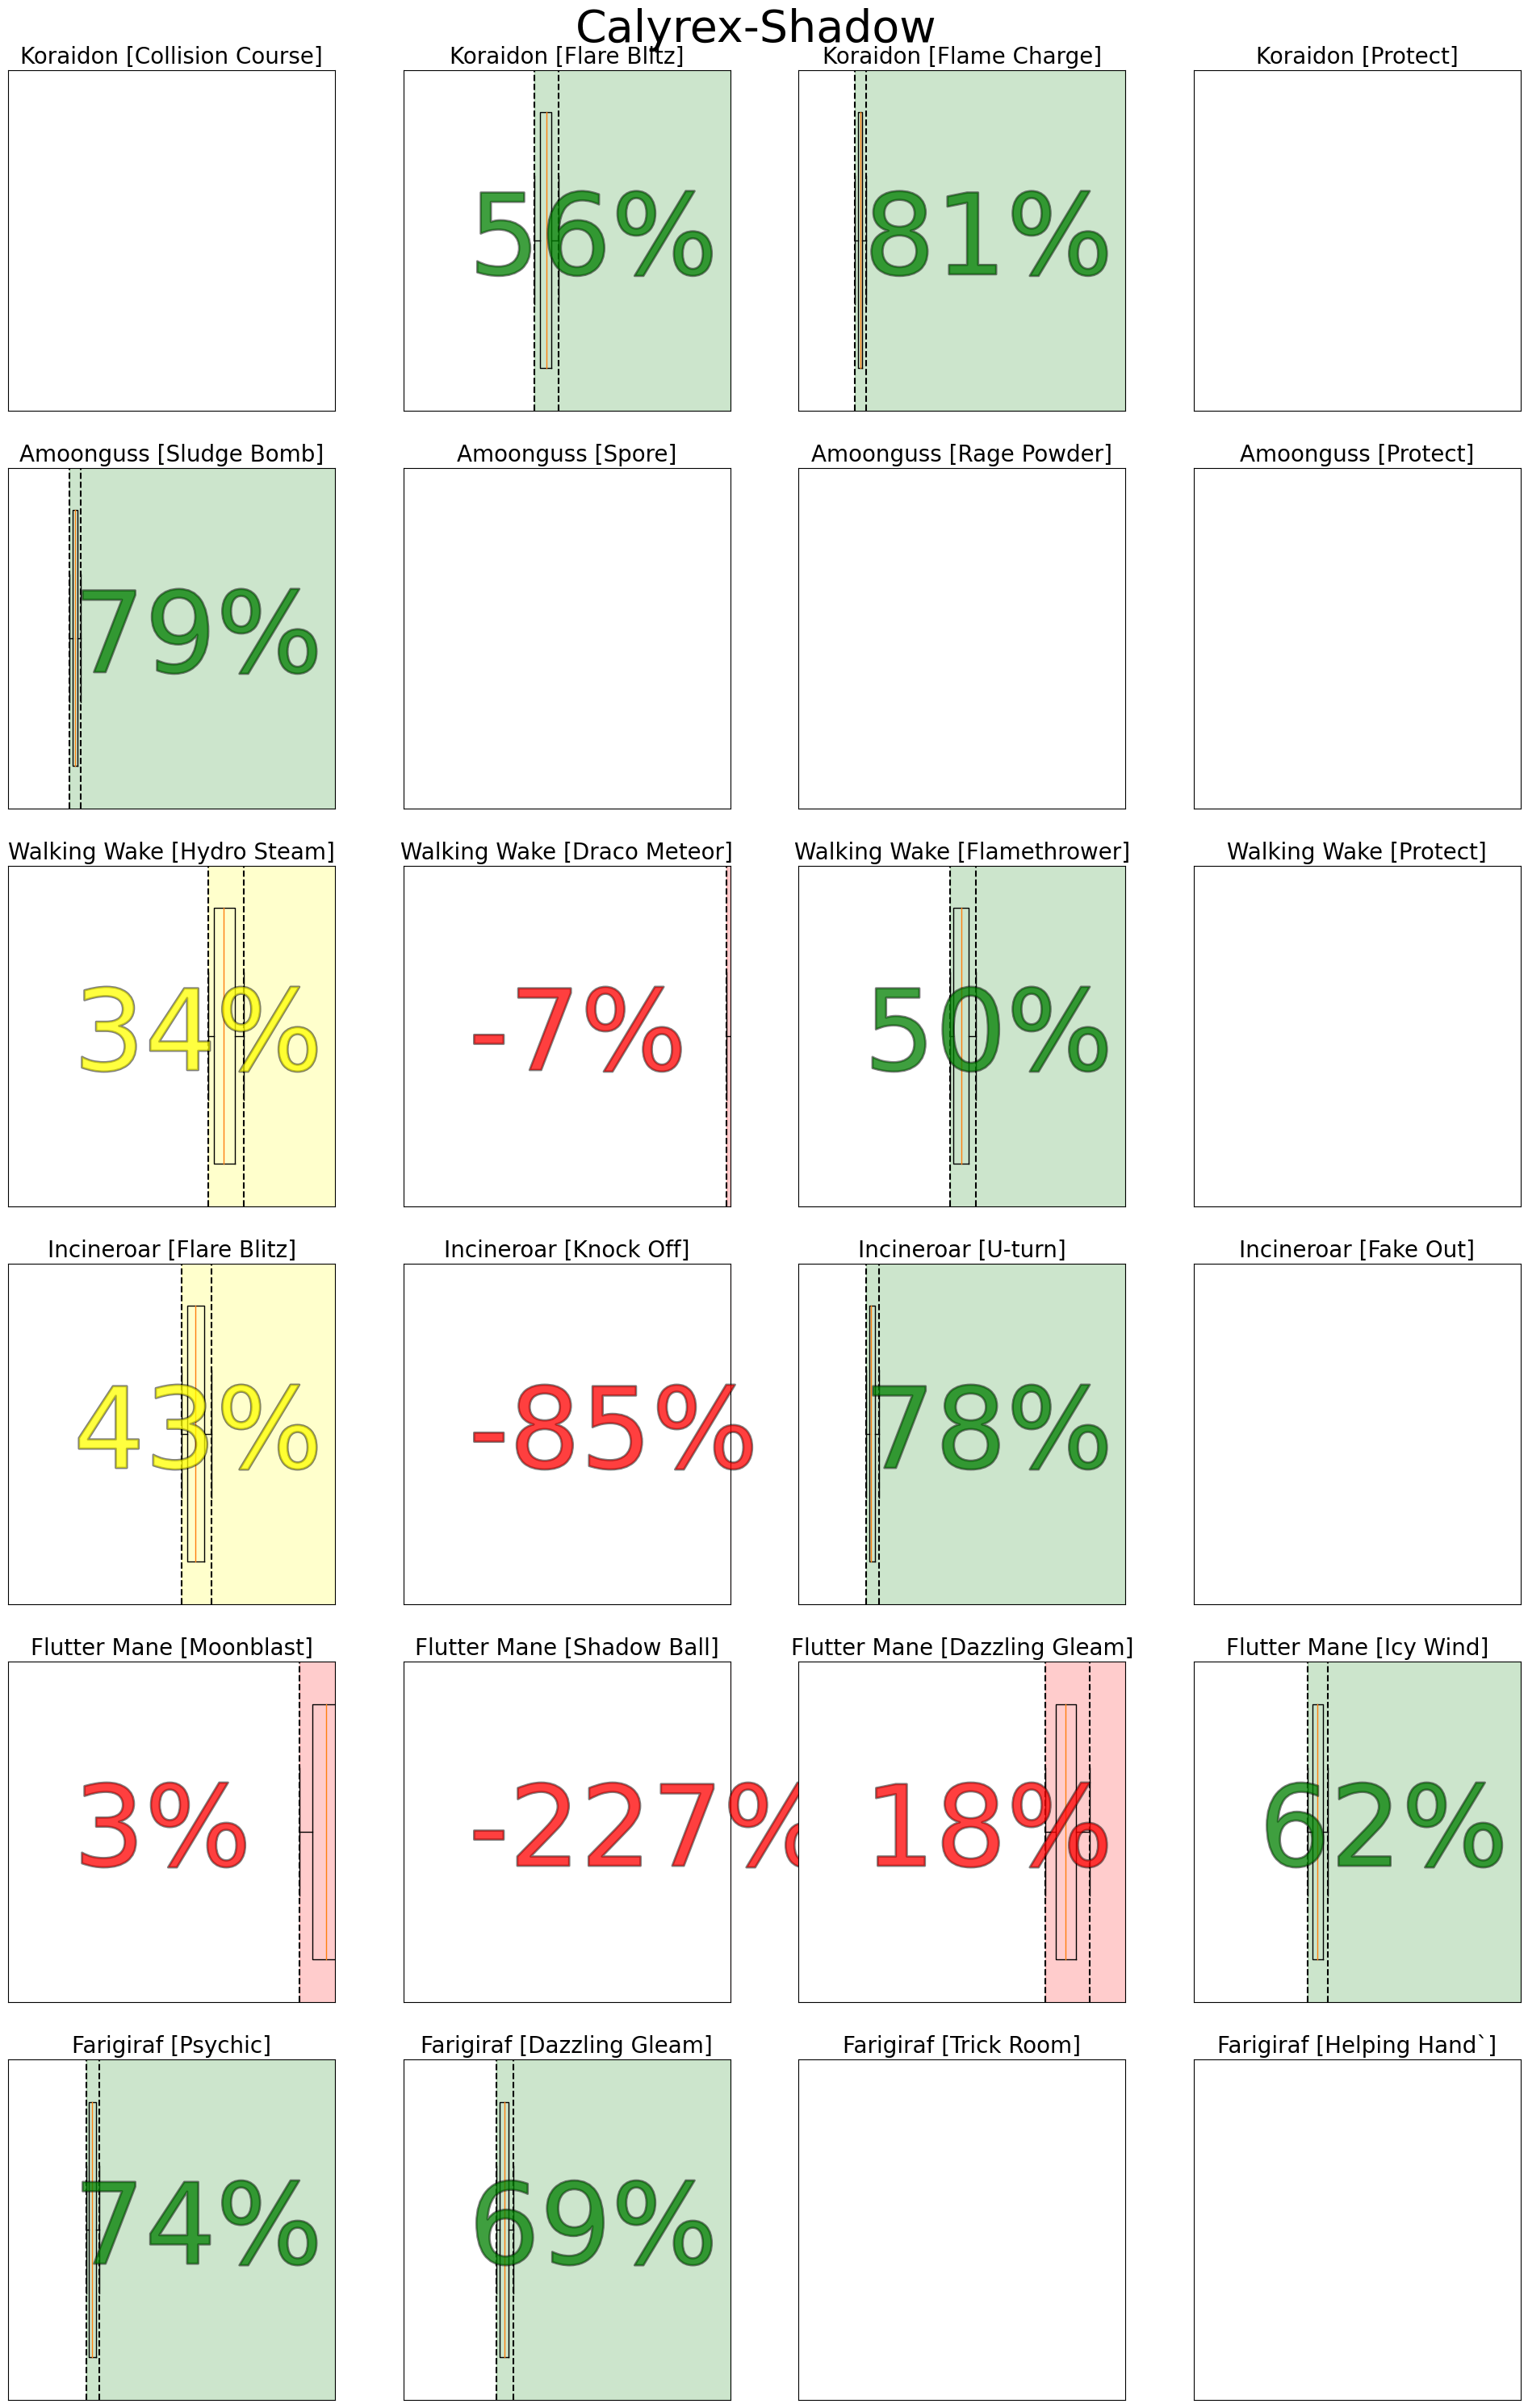

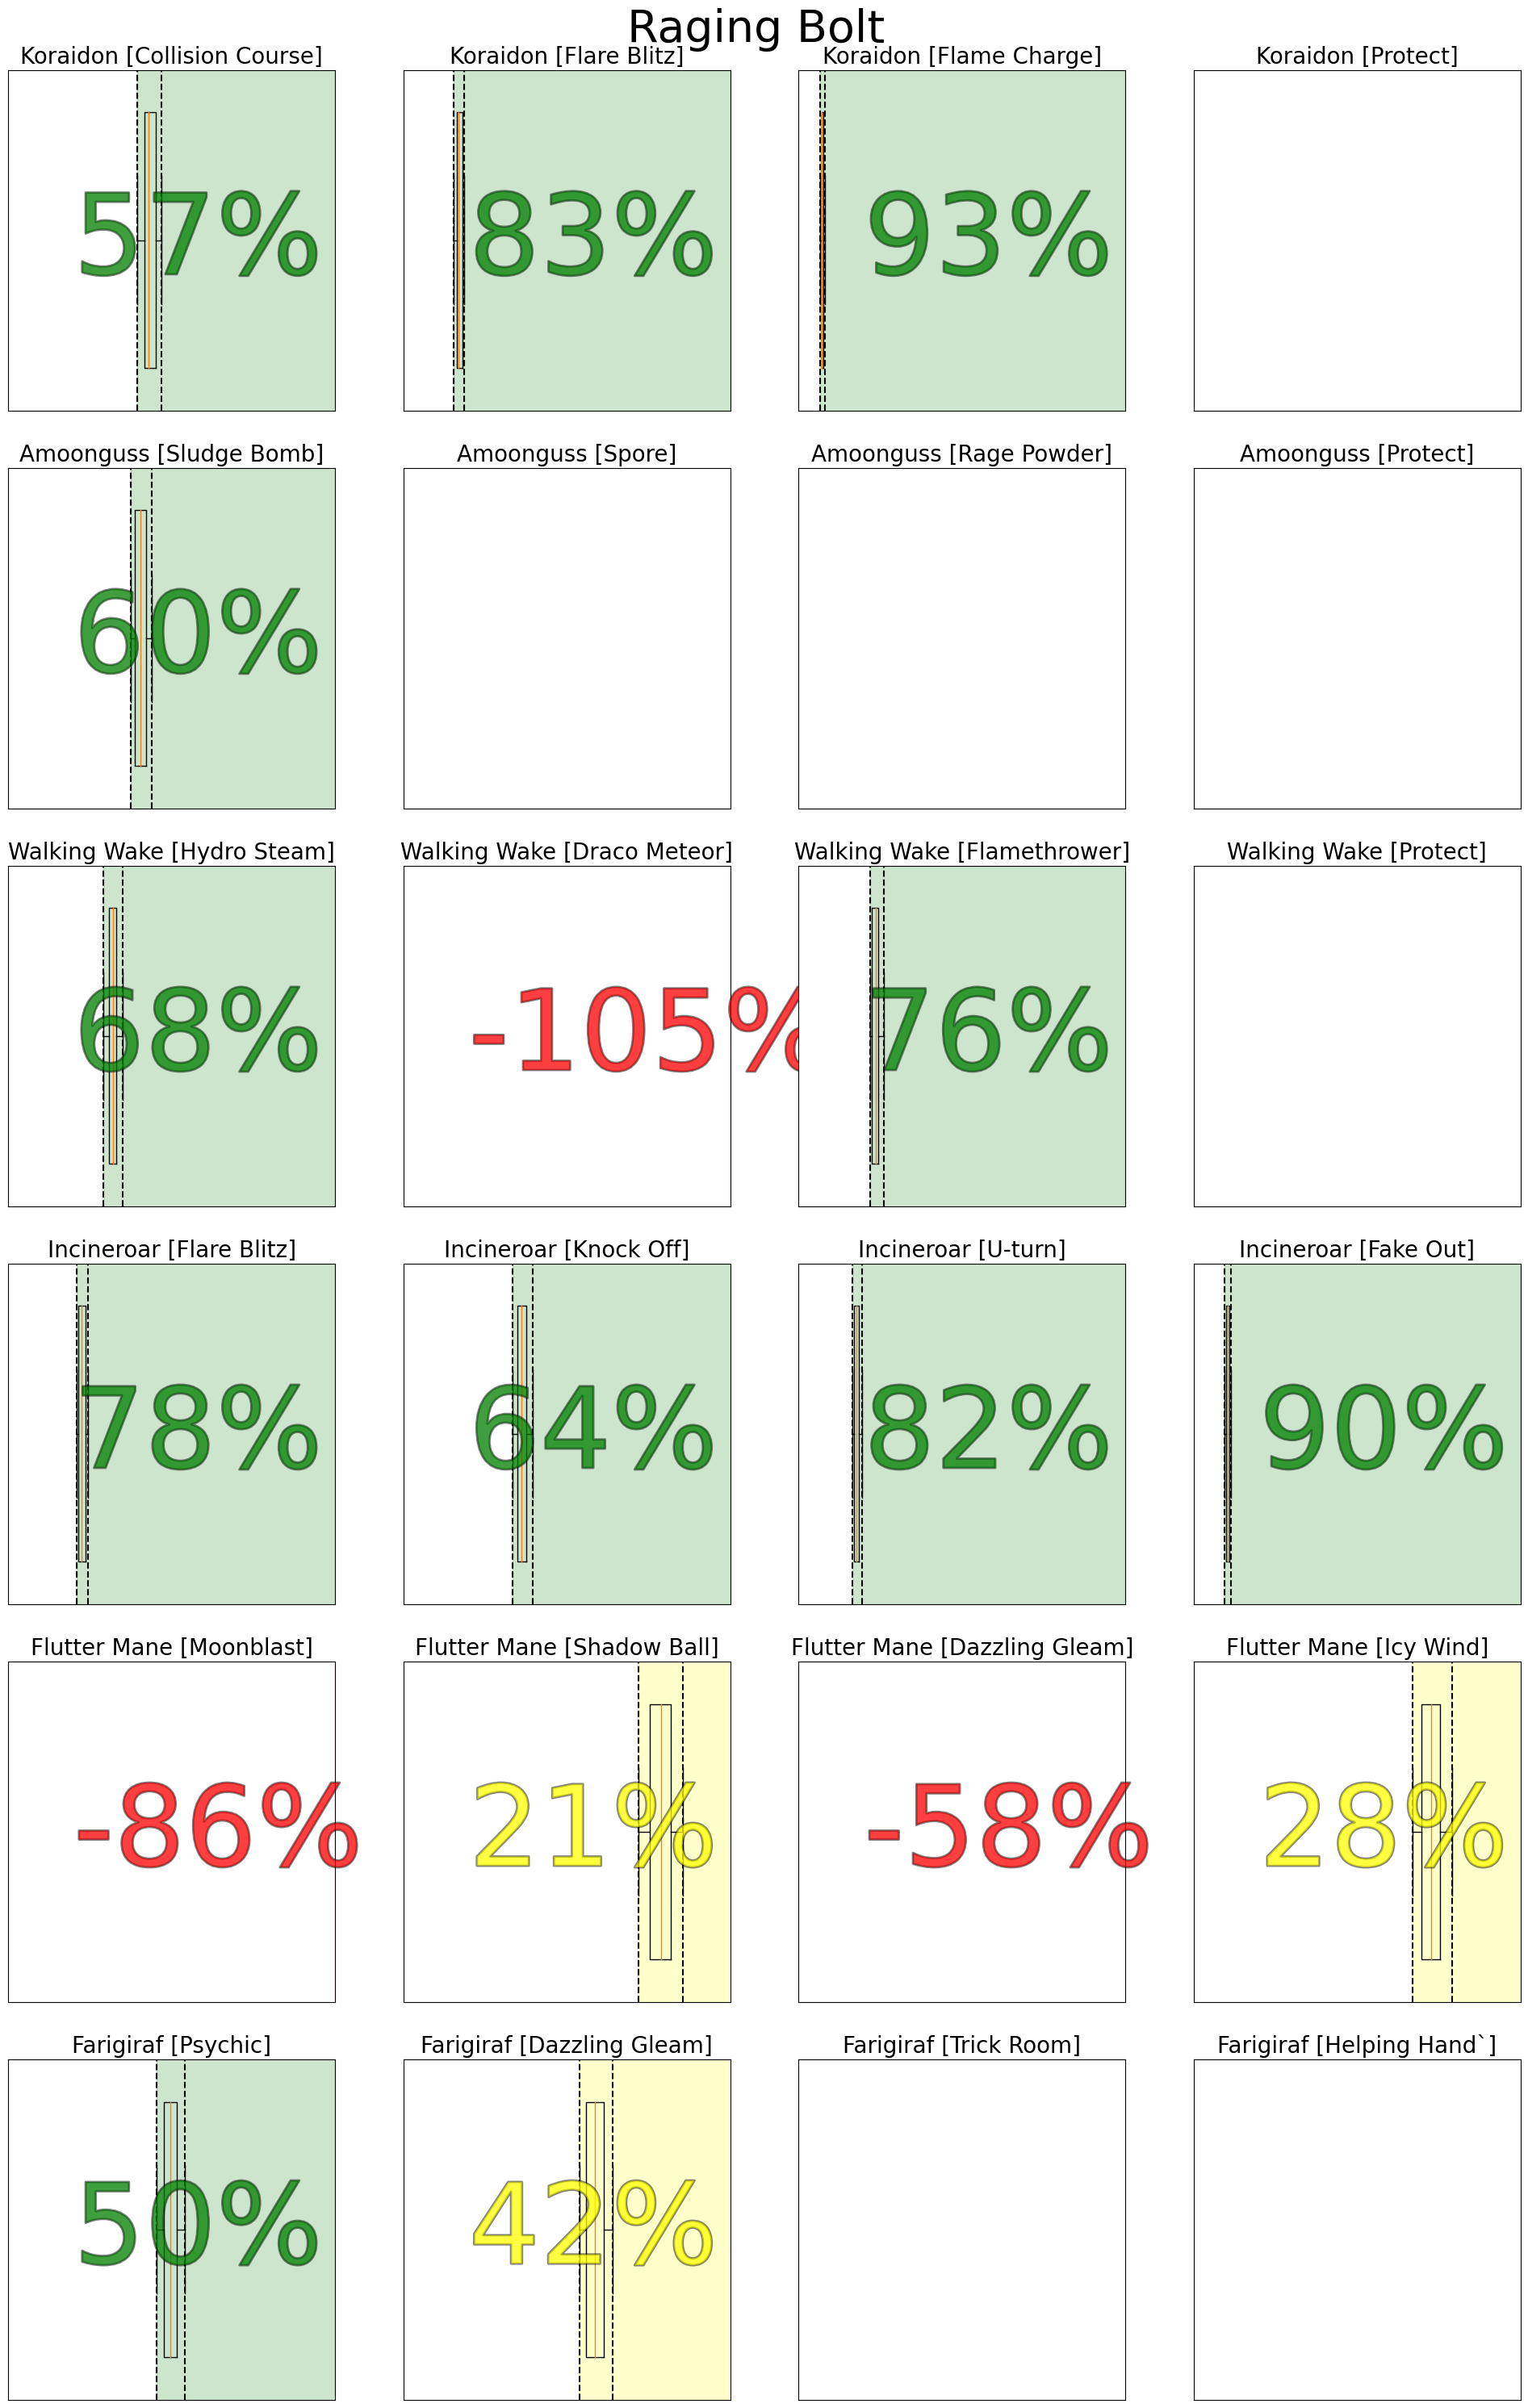

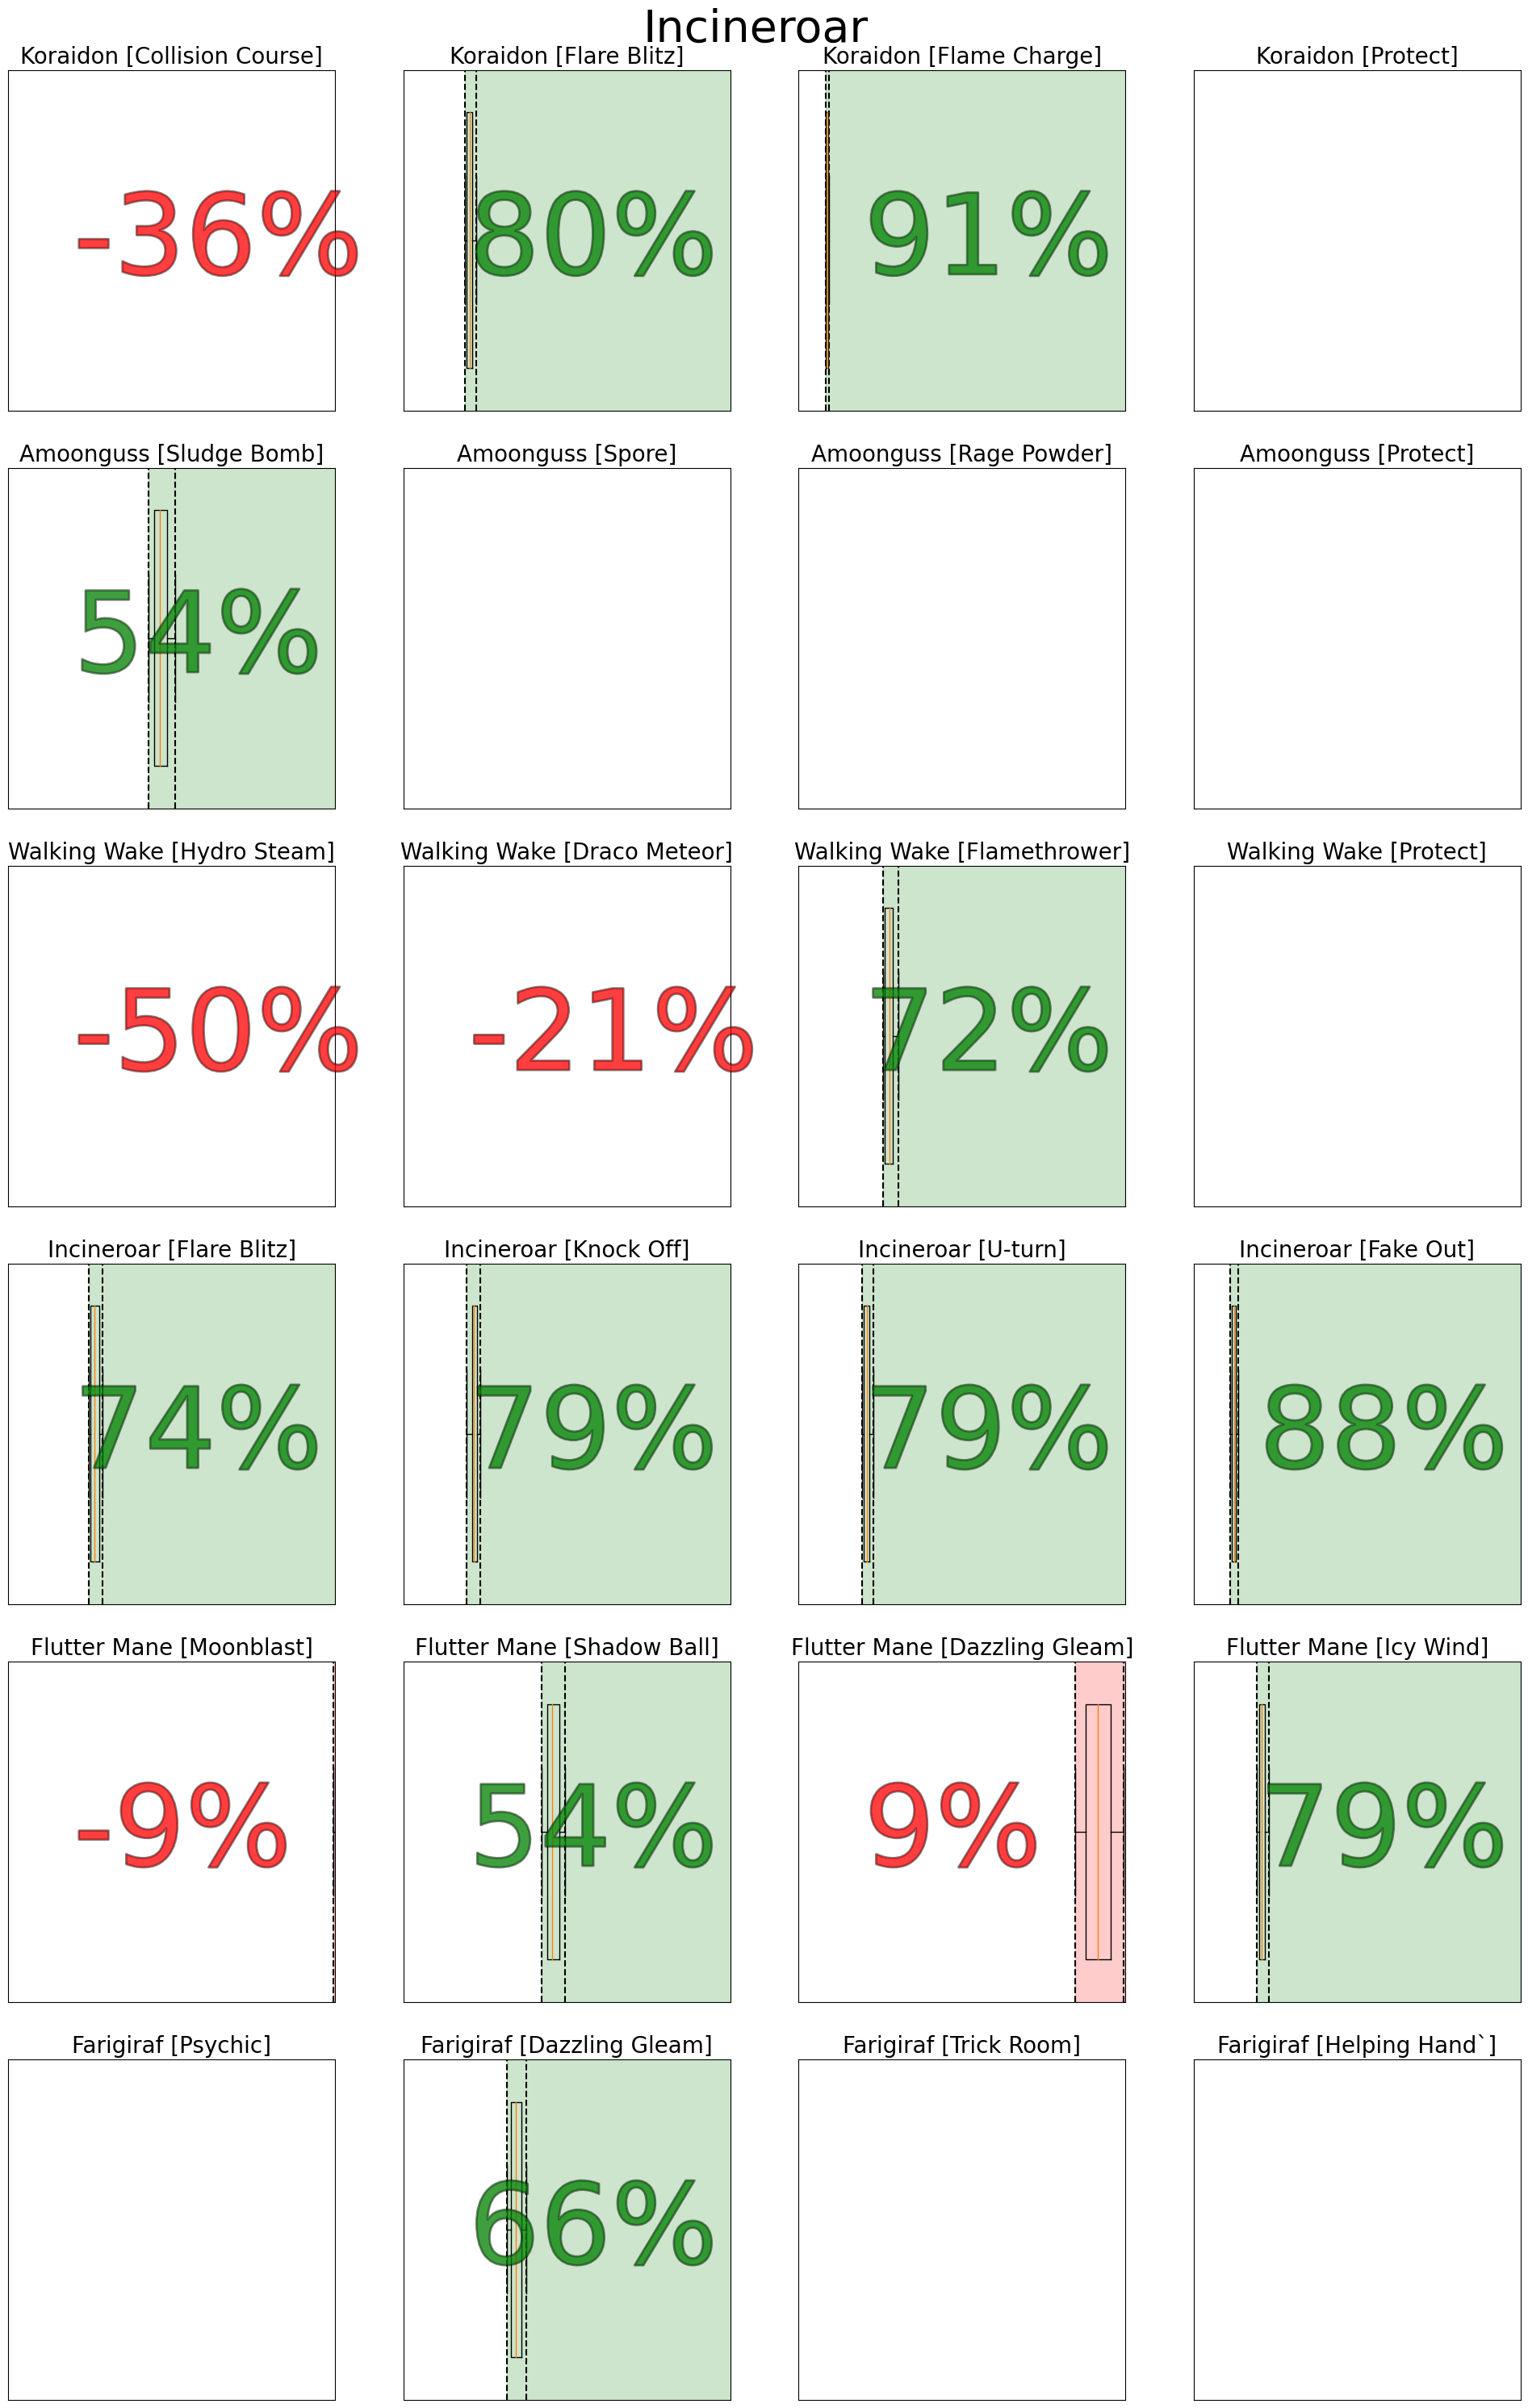

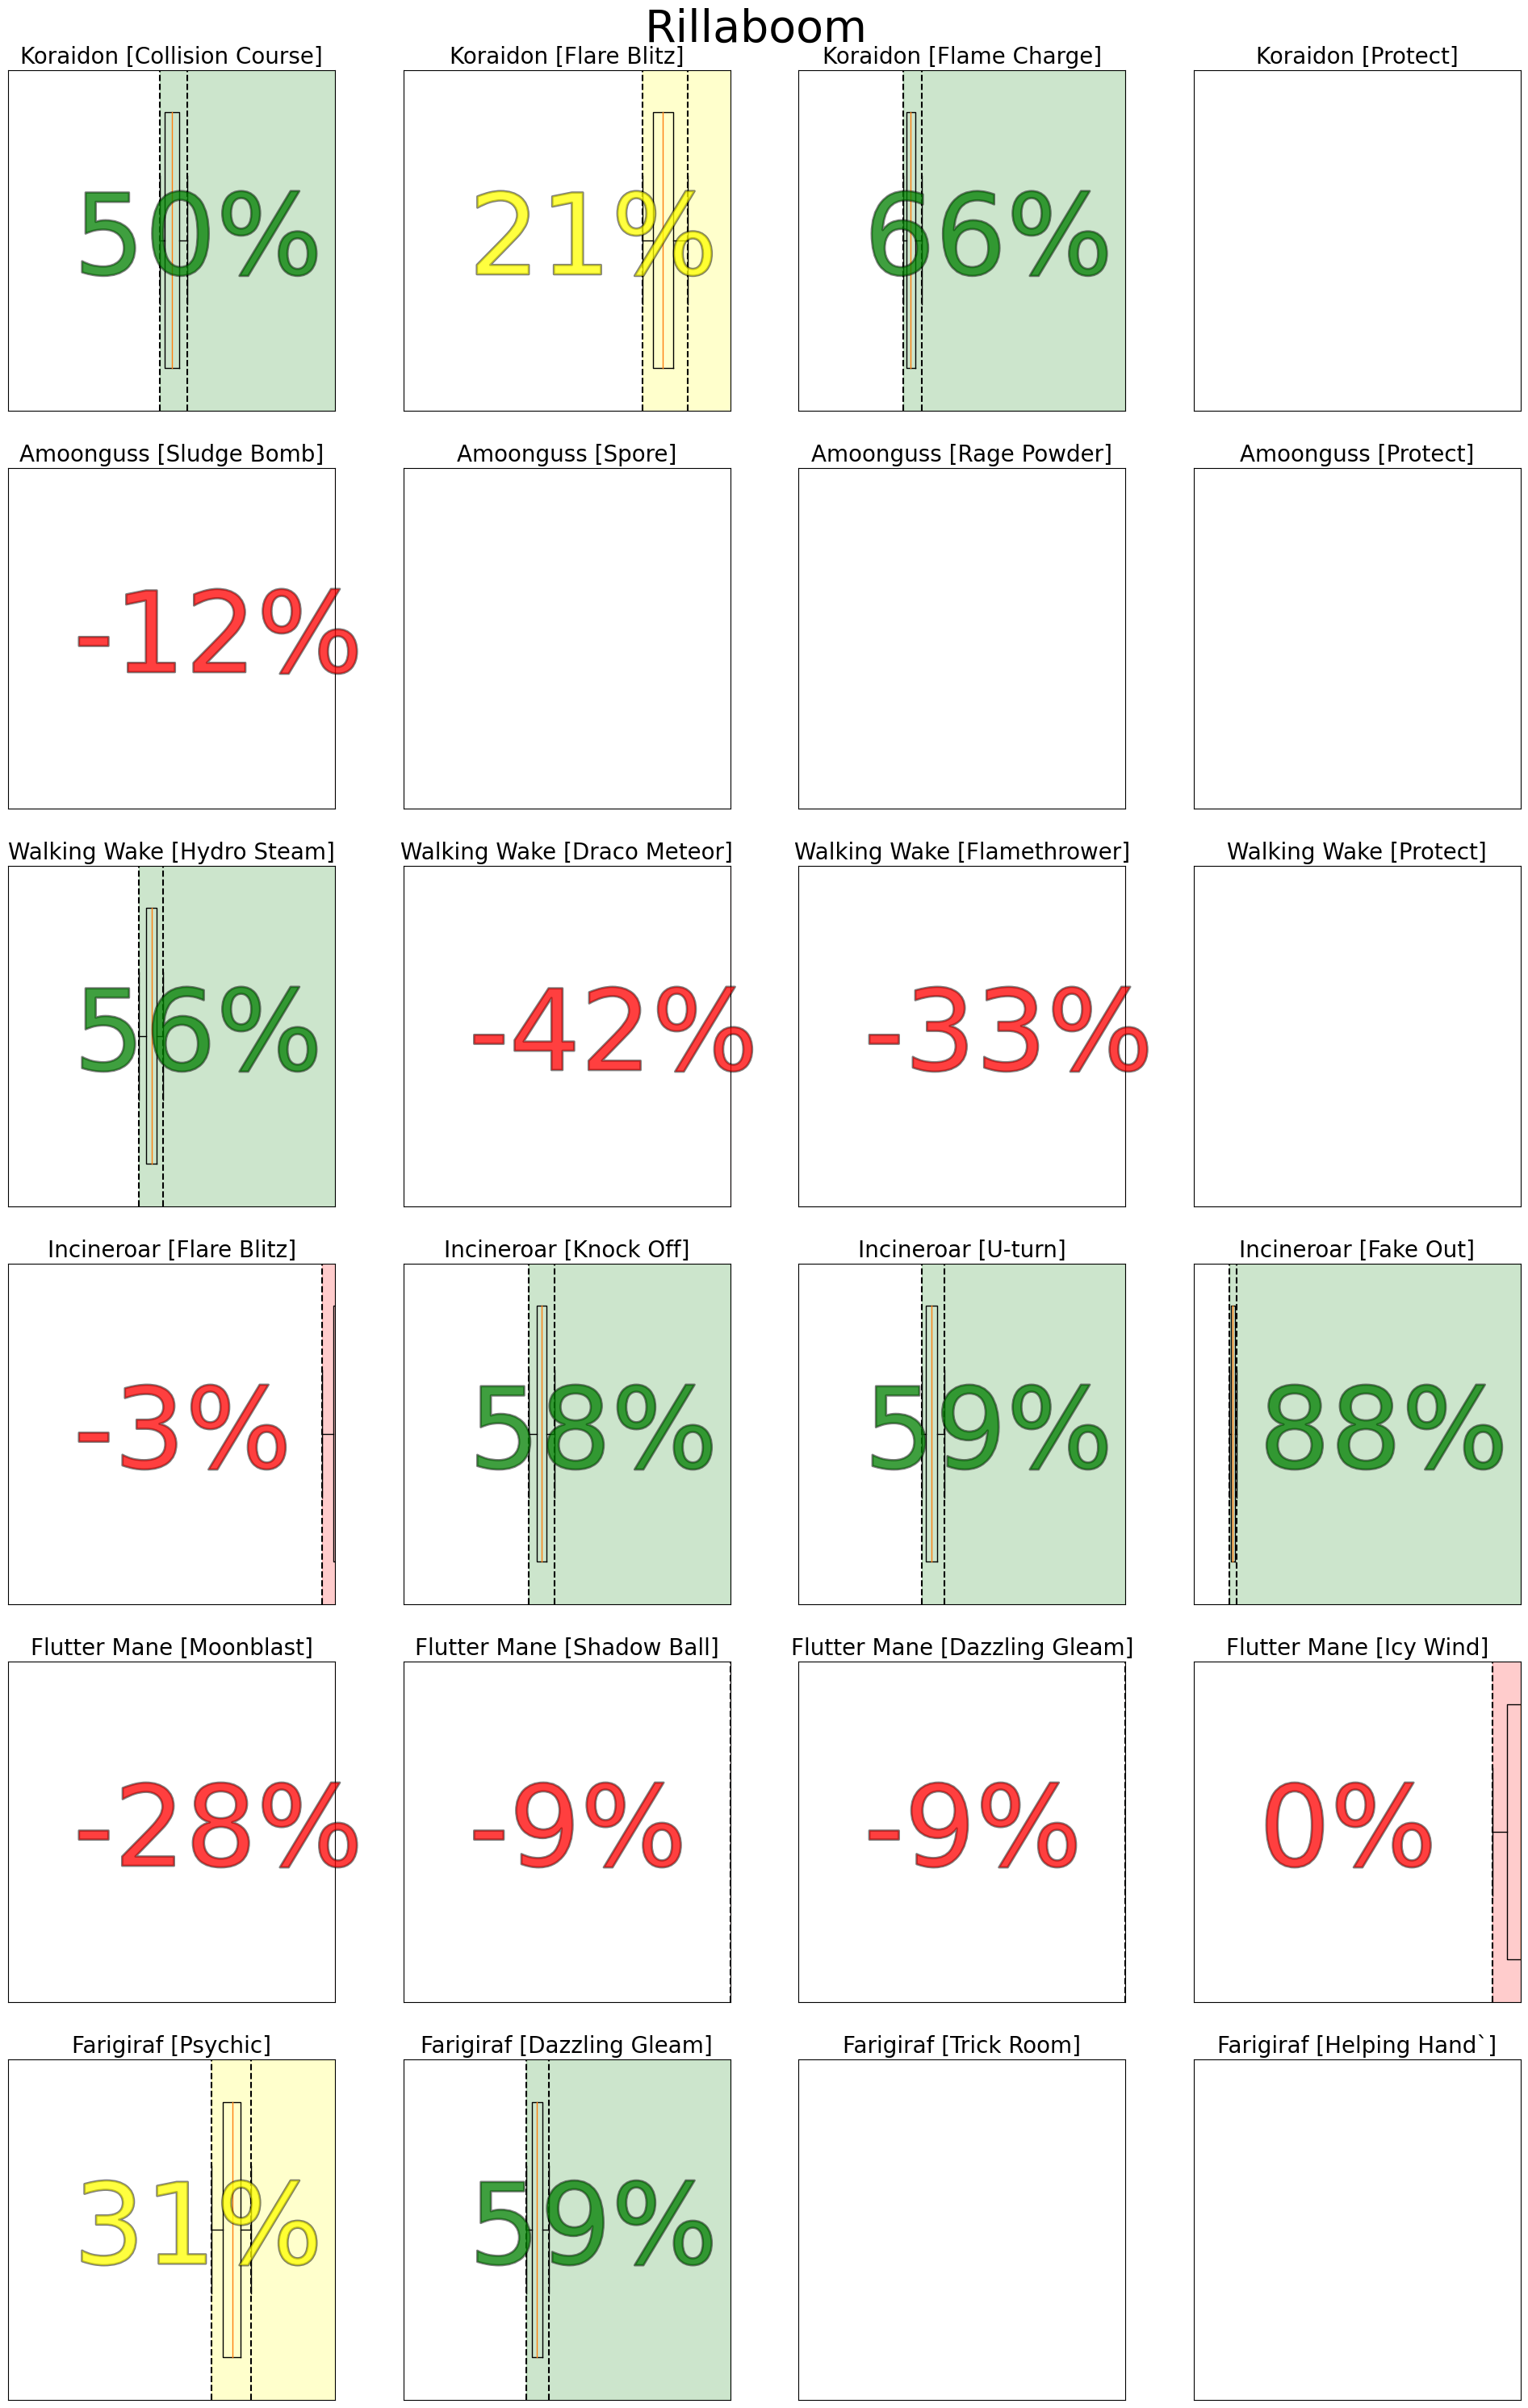

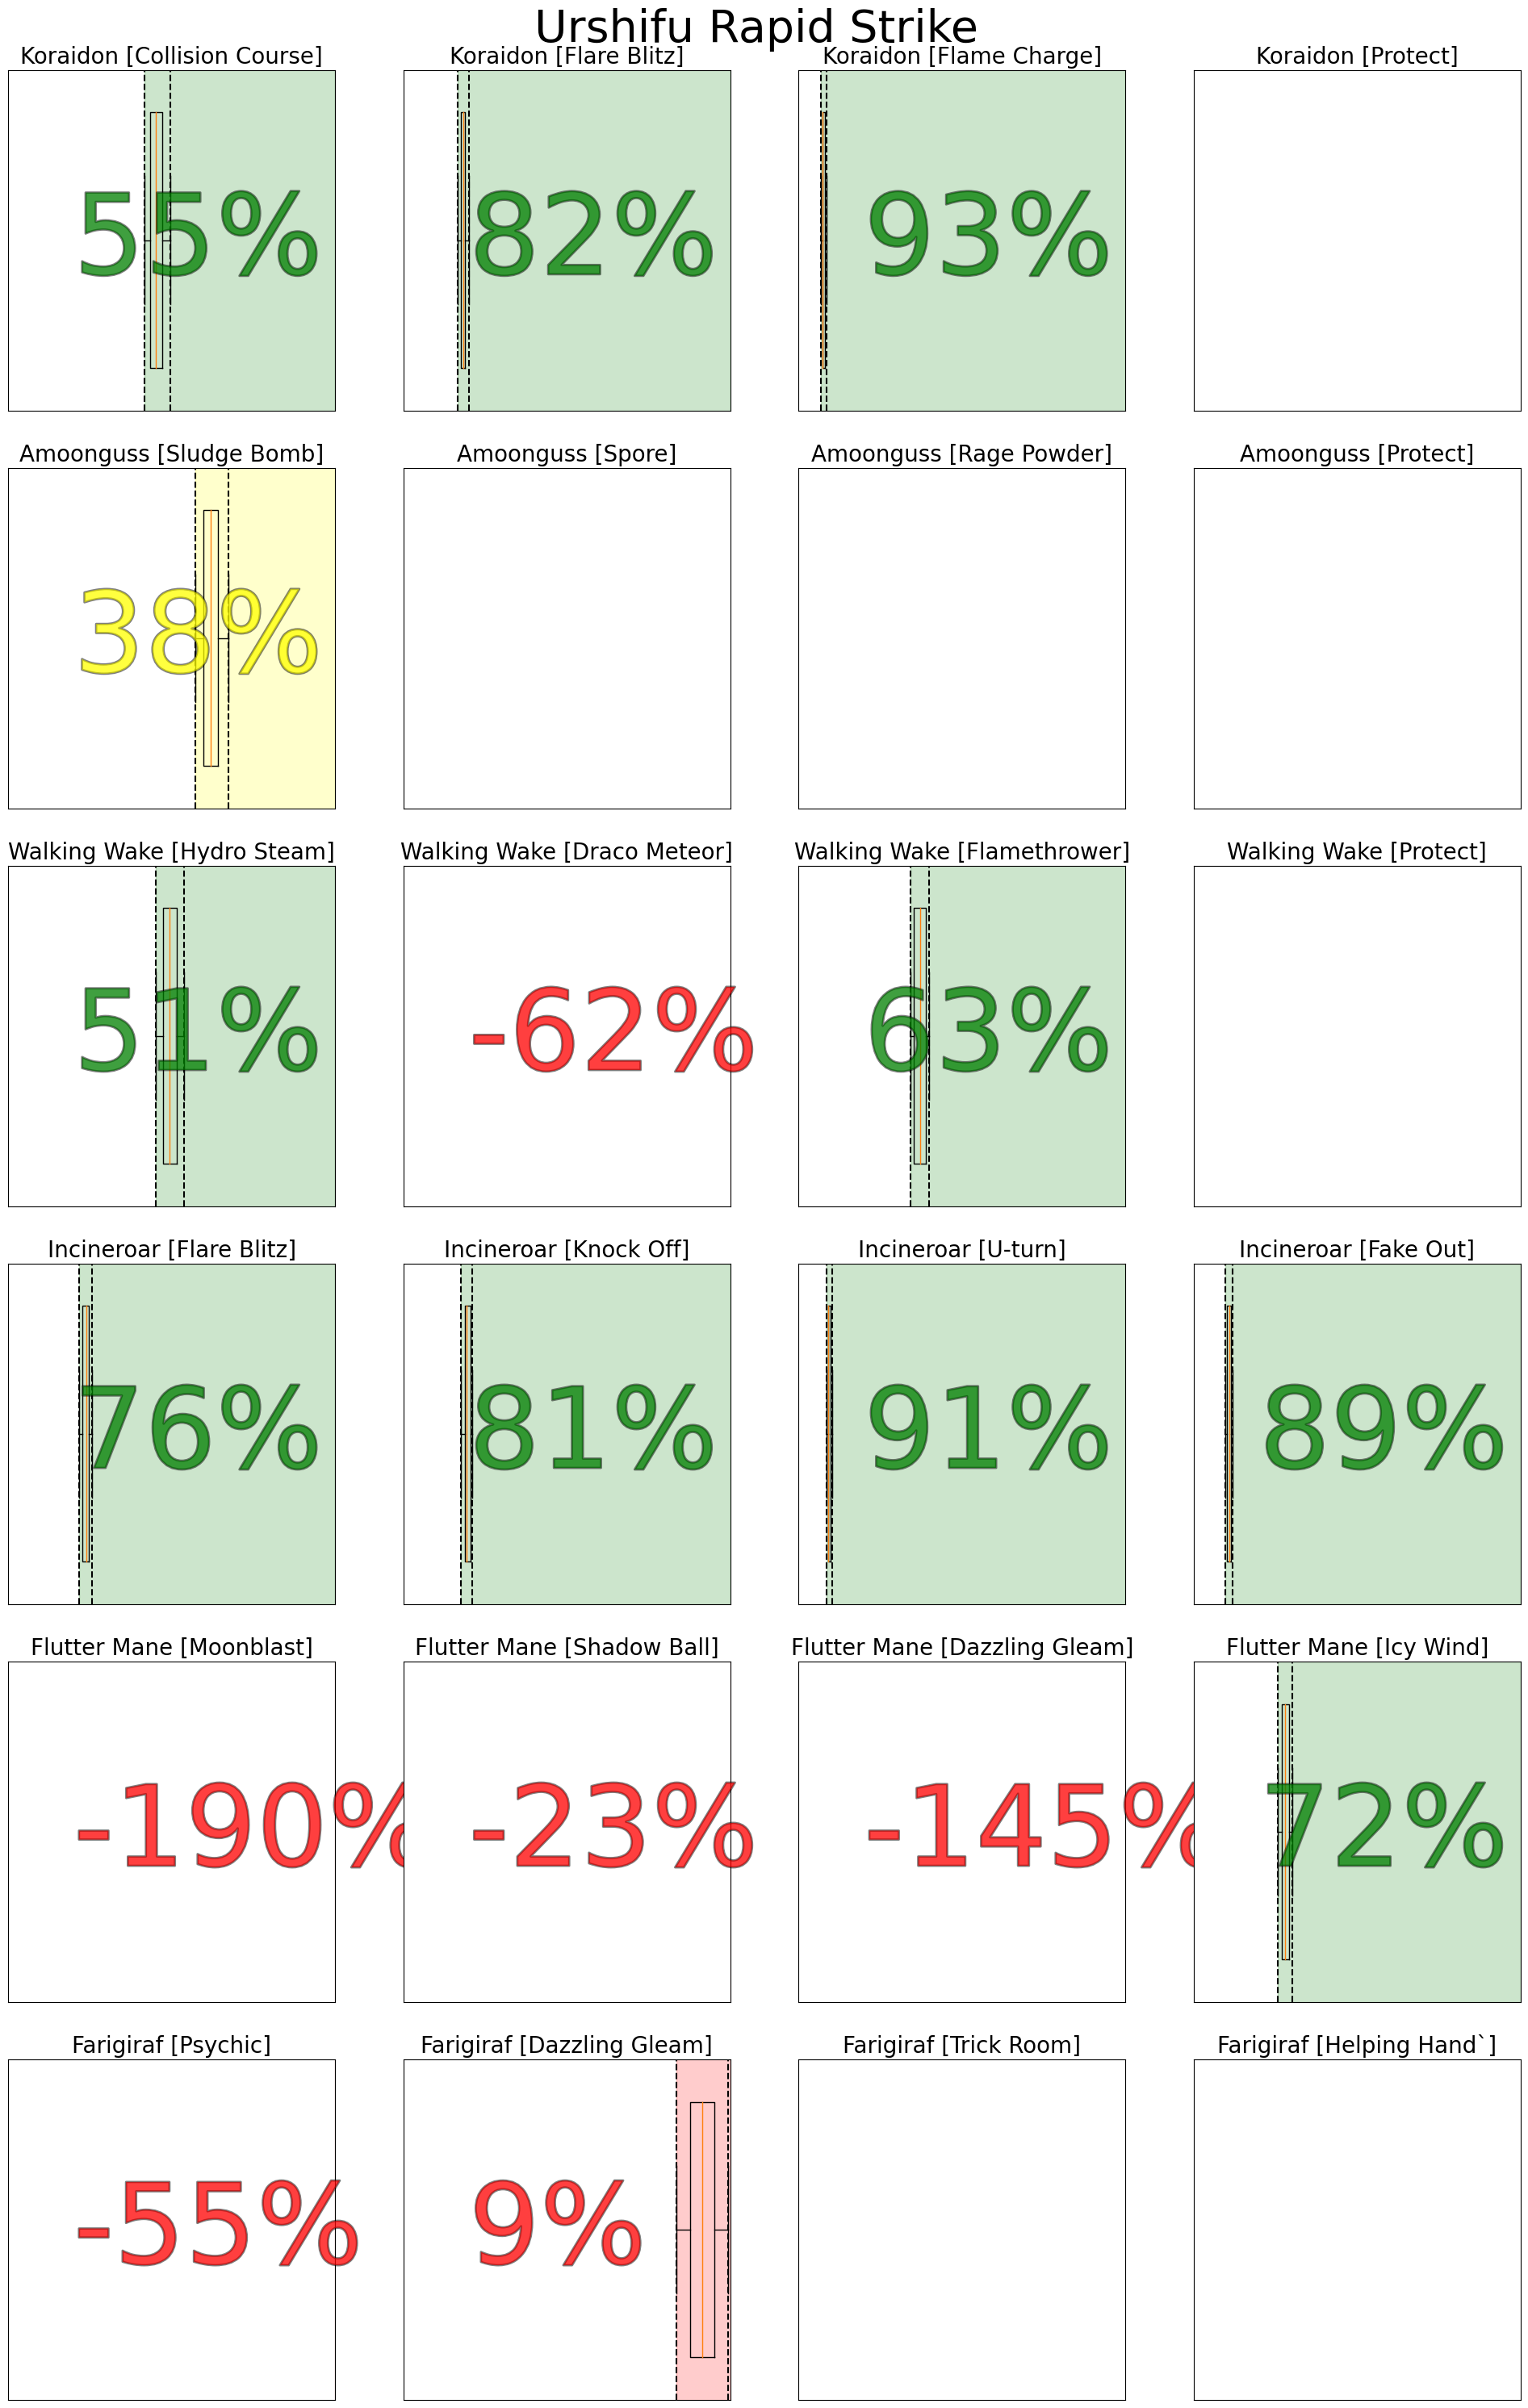

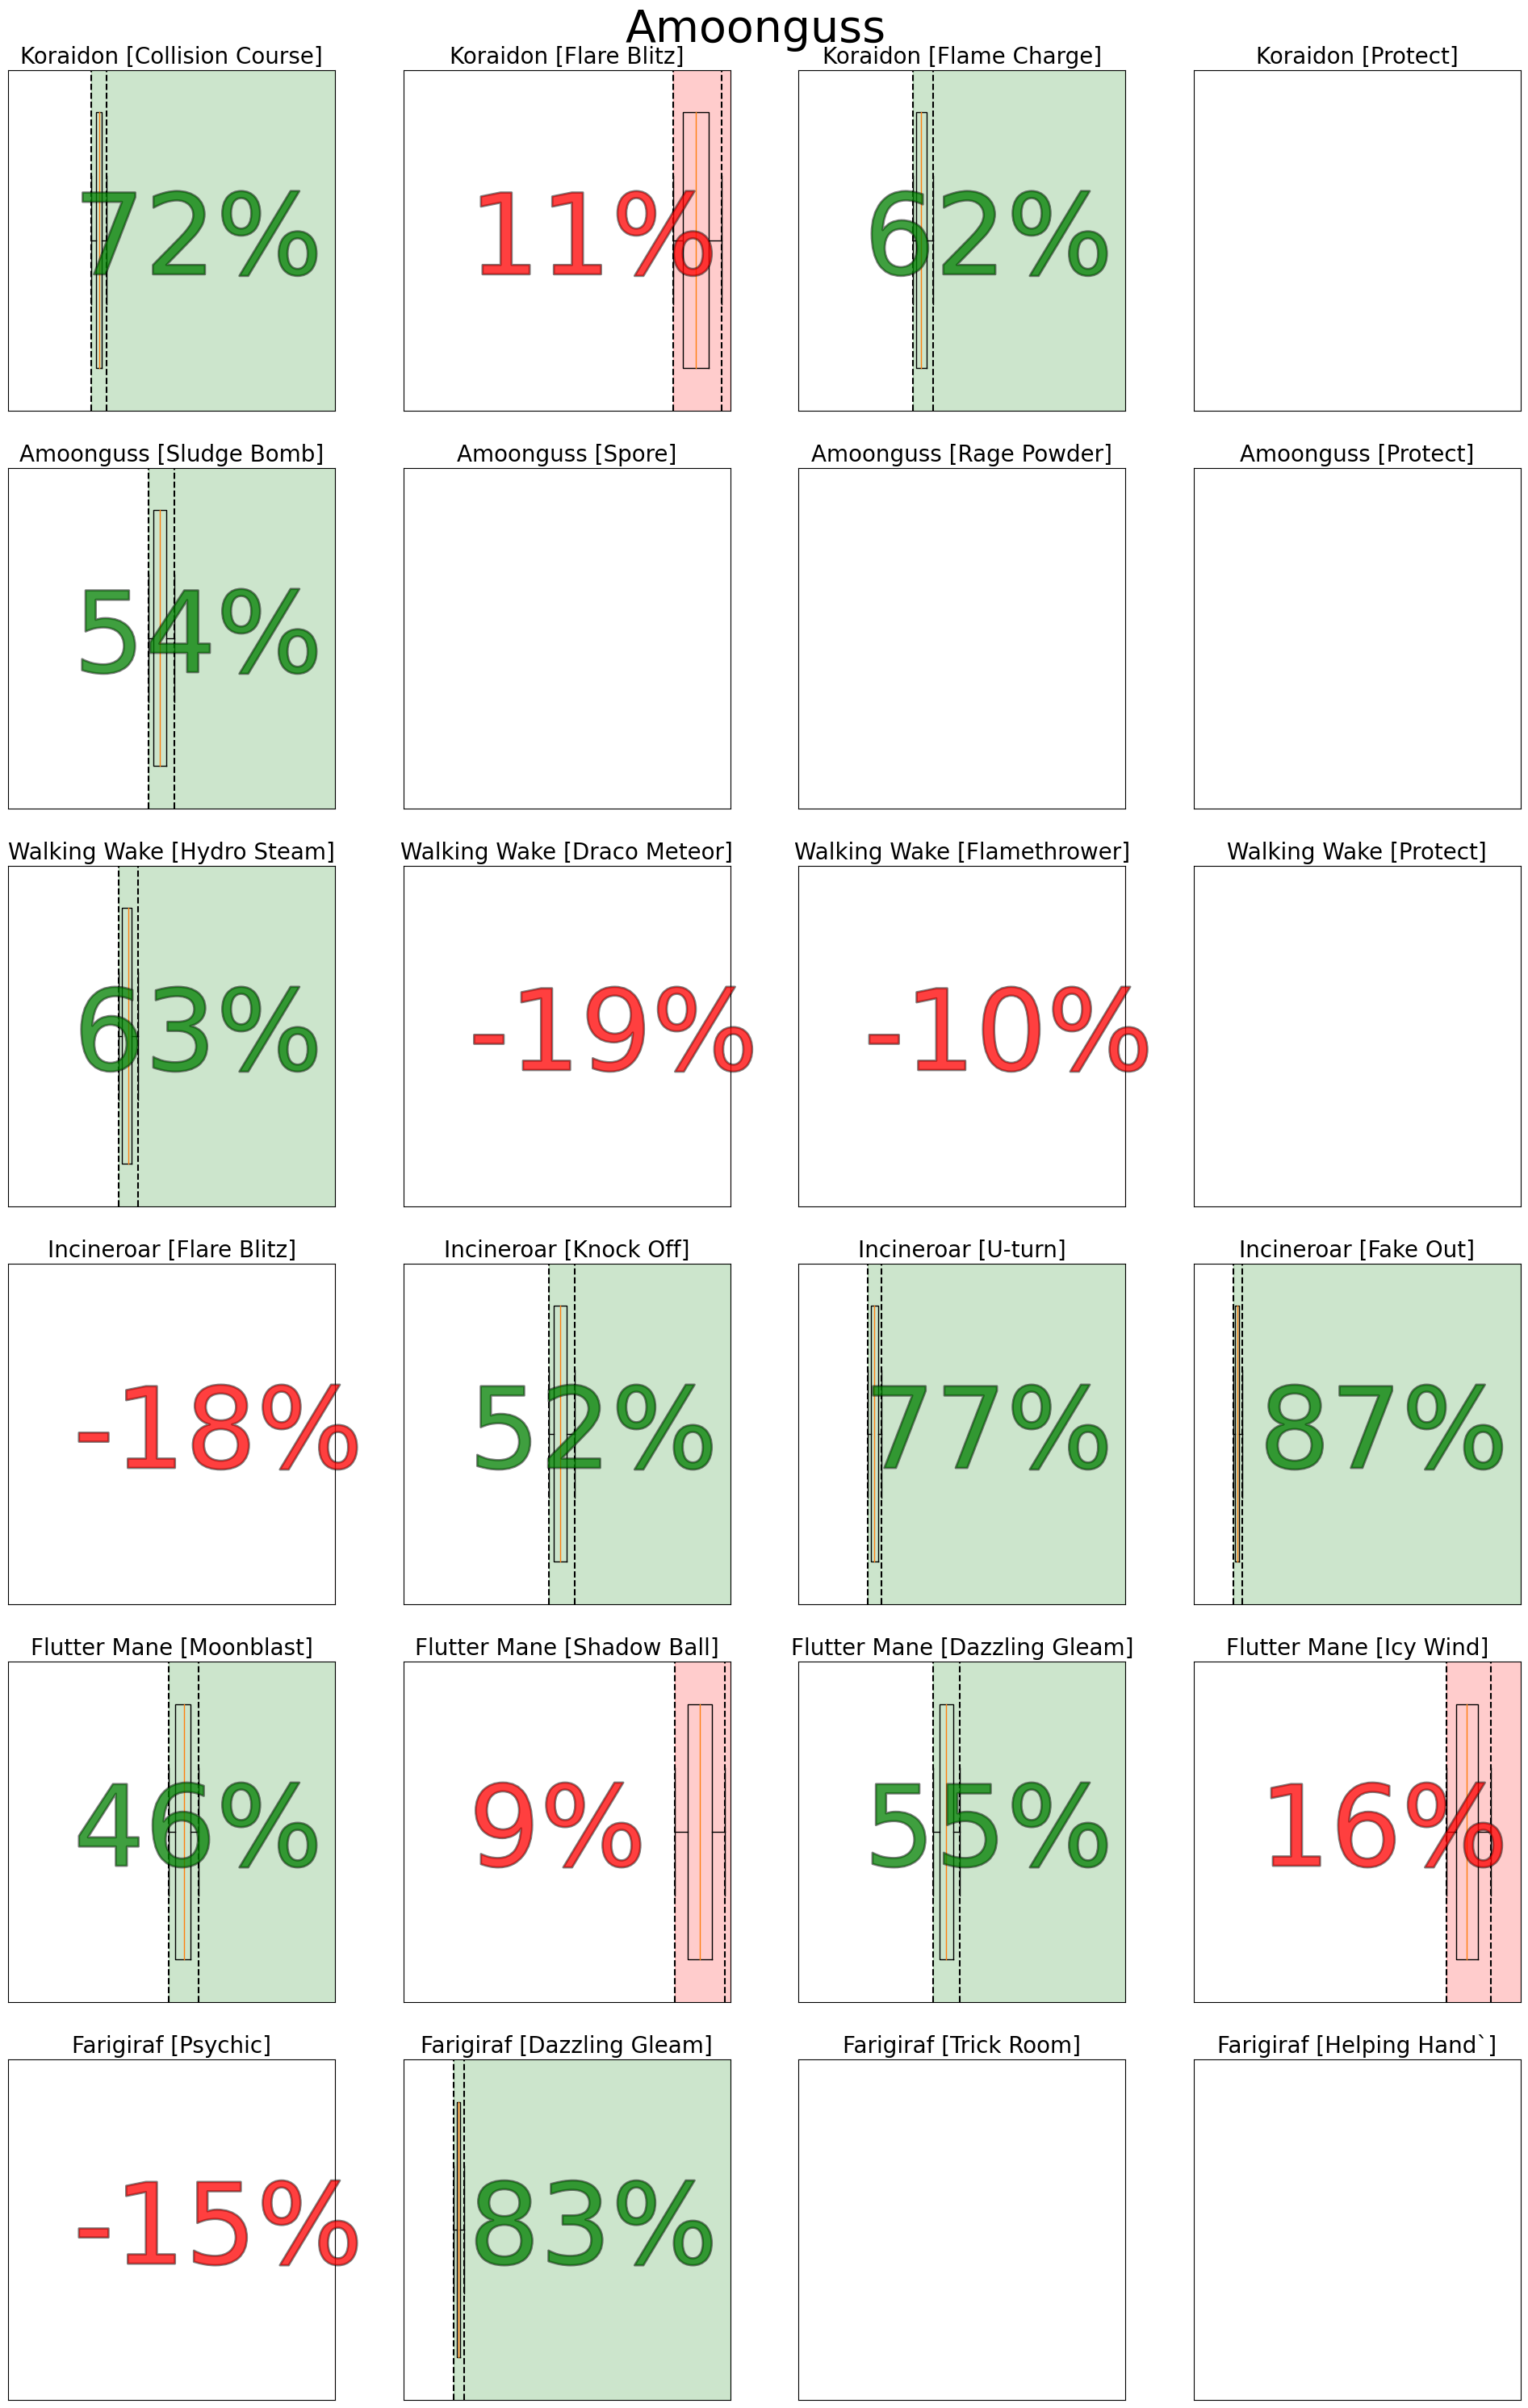

In [157]:
for i in range(6):
    move(teams[0], pokemon=teams[1]["pokemon"][i])

